In [1]:
# 必要なライブラリをimportします
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# 可視化のためのセットです。
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Pythonで日付と時刻を扱うためのモジュールです
from datetime import datetime

# Python2を使っている場合は必要です
from __future__ import division

In [101]:
# 所謂ハイテク企業の株価を扱ってみます。
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# 直近1年間のデータを使ってみましょう。
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

# それぞれの企業ごとに、Yahooのサイトからデータを取得します
for stock in tech_list:   
    # それぞれの名前でDataFrameを作ります。
    import quandl
for stock in tech_list:
    globals()[stock] = quandl.get('WIKI/{}'.format(stock),start_date=start,end_date=end)

In [102]:
# データの概観を掴むことができます。
AAPL.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,156.000000,156.000000,156.000000,156.000000,1.560000e+02,156.0,156.0,156.000000,156.000000,156.000000,156.000000,1.560000e+02
mean,167.183814,168.492306,165.834142,167.175499,3.055292e+07,0.0,1.0,167.183814,168.492306,165.834142,167.175499,3.055292e+07
std,8.169802,8.188870,8.199330,8.144795,1.221983e+07,0.0,0.0,8.169802,8.188870,8.199330,8.144795,1.221983e+07
min,149.990000,151.830000,149.160000,150.550000,1.402652e+07,0.0,1.0,149.990000,151.830000,149.160000,150.550000,1.402652e+07
25%,159.615000,160.732500,158.352500,159.775000,2.186115e+07,0.0,1.0,159.615000,160.732500,158.352500,159.775000,2.186115e+07
50%,169.910000,170.685000,168.390000,169.300000,2.793825e+07,0.0,1.0,169.910000,170.685000,168.390000,169.300000,2.793825e+07
75%,174.042500,175.105000,173.050000,174.300000,3.636531e+07,0.0,1.0,174.042500,175.105000,173.050000,174.300000,3.636531e+07
max,182.590000,183.500000,180.210000,181.720000,8.543608e+07,0.0,1.0,182.590000,183.500000,180.210000,181.720000,8.543608e+07


In [4]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 2017-08-11 to 2018-03-27
Data columns (total 12 columns):
Open           156 non-null float64
High           156 non-null float64
Low            156 non-null float64
Close          156 non-null float64
Volume         156 non-null float64
Ex-Dividend    156 non-null float64
Split Ratio    156 non-null float64
Adj. Open      156 non-null float64
Adj. High      156 non-null float64
Adj. Low       156 non-null float64
Adj. Close     156 non-null float64
Adj. Volume    156 non-null float64
dtypes: float64(12)
memory usage: 15.8 KB


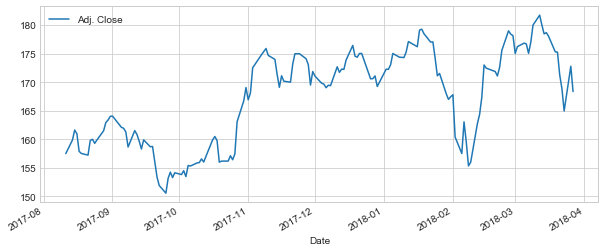

In [5]:
AAPL['Adj. Close'].plot(legend=True,figsize=(10,4))

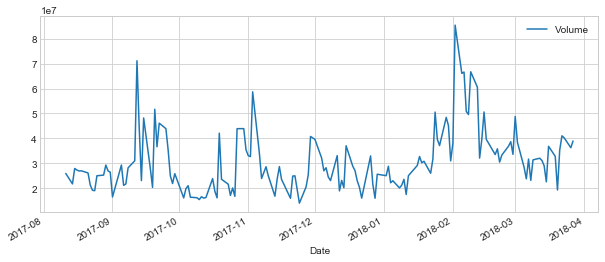

In [6]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [7]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    AAPL[column_name] = AAPL['Adj. Close'].rolling(center=False,window=5).mean()

In [8]:
AAPL.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,MA 10,MA 20,MA 50
Date,,,,,,,,,,,,,,,
2017-08-11,156.60,158.5728,156.07,157.48,25943187.0,0.0,1.0,156.60,158.5728,156.07,157.48,25943187.0,NaN,NaN,NaN
2017-08-14,159.32,160.2100,158.75,159.85,21754810.0,0.0,1.0,159.32,160.2100,158.75,159.85,21754810.0,NaN,NaN,NaN
2017-08-15,160.66,162.1950,160.14,161.60,27936774.0,0.0,1.0,160.66,162.1950,160.14,161.60,27936774.0,NaN,NaN,NaN
2017-08-16,161.94,162.5100,160.15,160.95,27321761.0,0.0,1.0,161.94,162.5100,160.15,160.95,27321761.0,NaN,NaN,NaN
2017-08-17,160.52,160.7100,157.84,157.87,26925694.0,0.0,1.0,160.52,160.7100,157.84,157.87,26925694.0,159.55,159.55,159.55


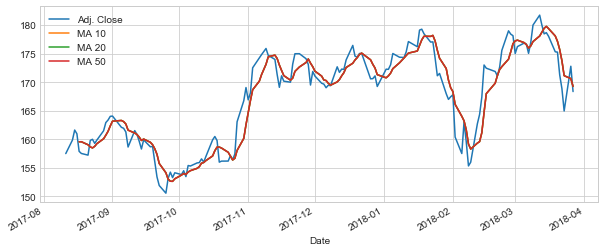

In [9]:
AAPL[['Adj. Close', 'MA 10','MA 20', 'MA 50']].plot(subplots=False, figsize=(10,4))

In [10]:
AAPL['Daily Return'] = AAPL['Adj. Close'].pct_change()

In [11]:
AAPL.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,,,,,,,
2017-08-11,156.60,158.5728,156.07,157.48,25943187.0,0.0,1.0,156.60,158.5728,156.07,157.48,25943187.0,NaN,NaN,NaN,NaN
2017-08-14,159.32,160.2100,158.75,159.85,21754810.0,0.0,1.0,159.32,160.2100,158.75,159.85,21754810.0,NaN,NaN,NaN,0.015050
2017-08-15,160.66,162.1950,160.14,161.60,27936774.0,0.0,1.0,160.66,162.1950,160.14,161.60,27936774.0,NaN,NaN,NaN,0.010948
2017-08-16,161.94,162.5100,160.15,160.95,27321761.0,0.0,1.0,161.94,162.5100,160.15,160.95,27321761.0,NaN,NaN,NaN,-0.004022
2017-08-17,160.52,160.7100,157.84,157.87,26925694.0,0.0,1.0,160.52,160.7100,157.84,157.87,26925694.0,159.55,159.55,159.55,-0.019136


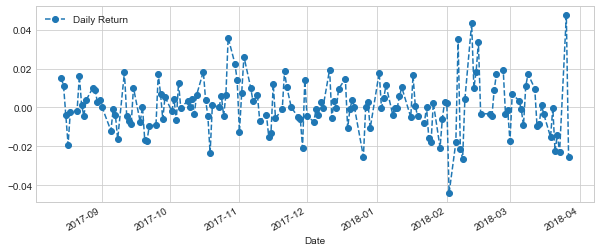

In [12]:
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


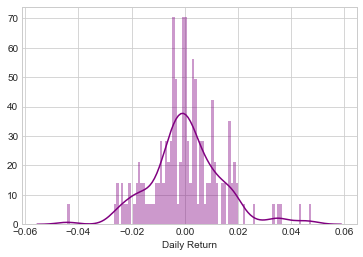

In [13]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

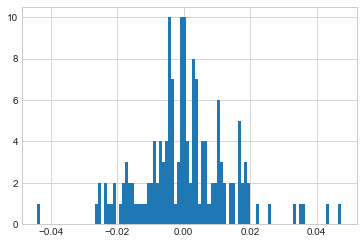

In [14]:
AAPL['Daily Return'].hist(bins=100)

In [15]:
closing_df=DataFrame(index=AAPL.index,columns=tech_list)
closing_df=closing_df.fillna(0)
closing_df.head()
for stock in tech_list:
    closing_df[stock] = quandl.get('WIKI/{}.11'.format(stock),start_date=start,end_date=end)

In [16]:
closing_df.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-08-11,157.48,914.39,71.752707,967.99
2017-08-14,159.85,922.67,72.831472,983.30
2017-08-15,161.60,922.22,72.851266,982.74
2017-08-16,160.95,926.96,73.279101,978.18
2017-08-17,157.87,910.98,72.035396,960.57


In [17]:
tech_rets = closing_df.pct_change()

In [18]:
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-08-11,NaN,NaN,NaN,NaN
2017-08-14,0.015050,0.009055,0.015034,0.015816
2017-08-15,0.010948,-0.000488,0.000272,-0.000570
2017-08-16,-0.004022,0.005140,0.005873,-0.004640
2017-08-17,-0.019136,-0.017239,-0.016972,-0.018003


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


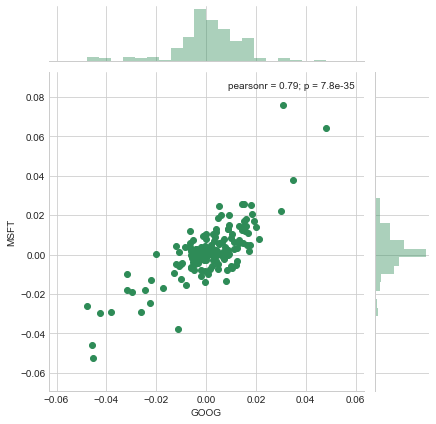

In [19]:
sns.jointplot('GOOG','MSFT',tech_rets, kind='scatter',color='seagreen')

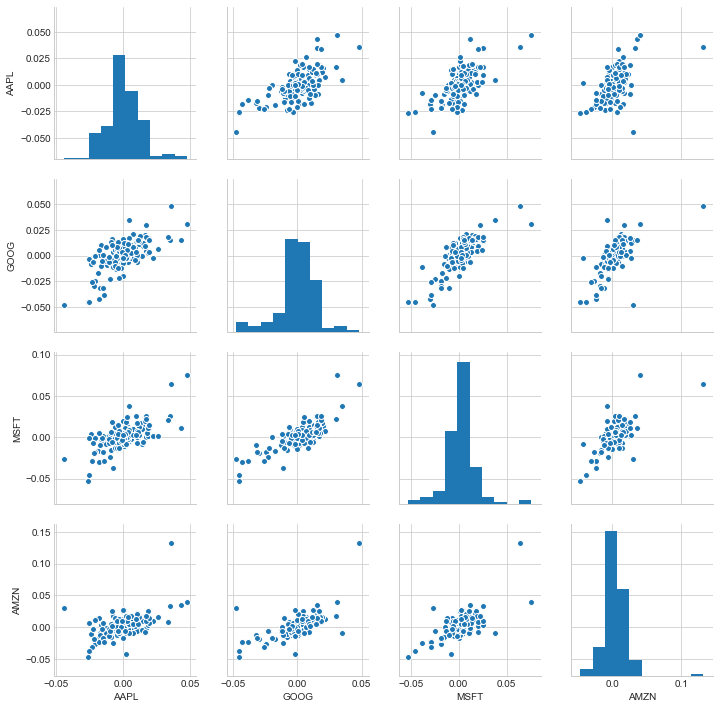

In [21]:
sns.pairplot(tech_rets.dropna())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


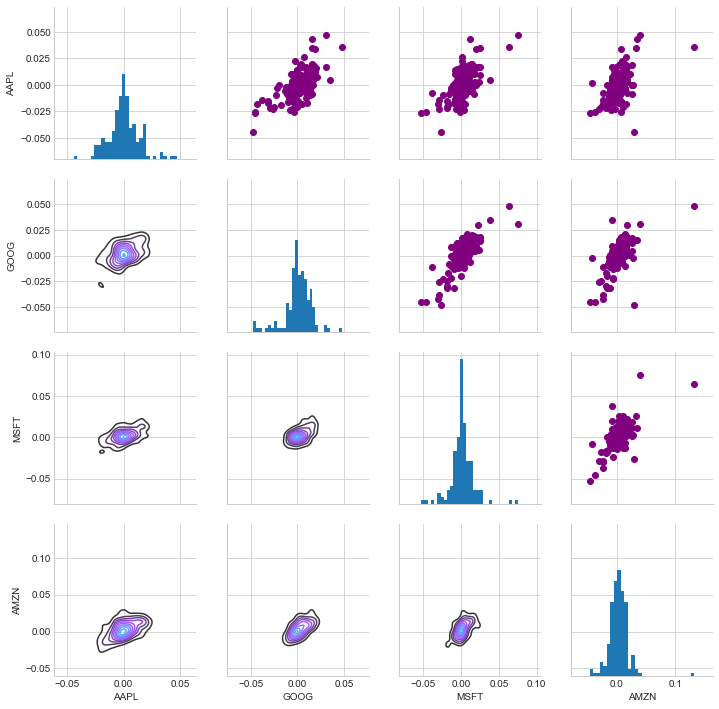

In [23]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


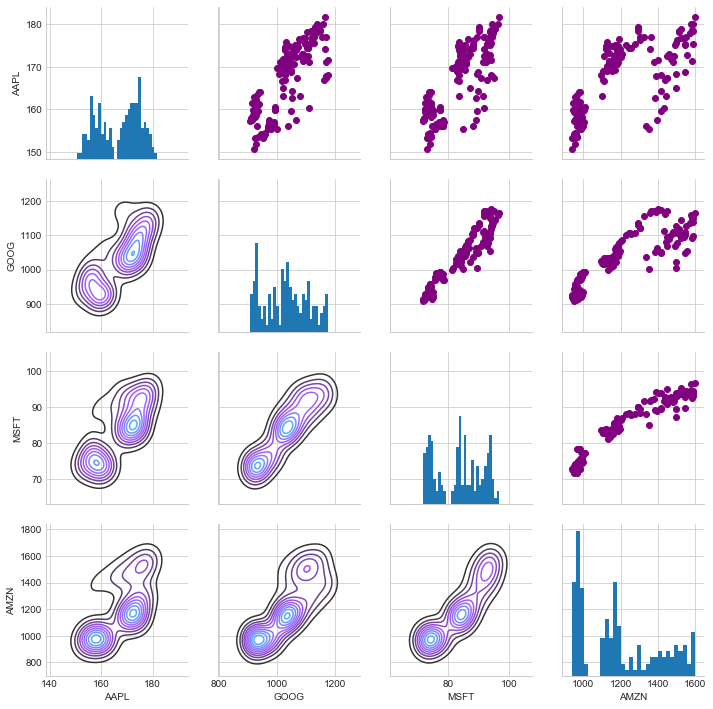

In [24]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

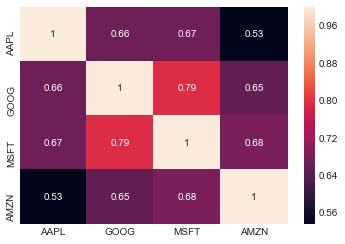

In [25]:
sns.heatmap(tech_rets.corr(), annot=True)

In [26]:
rets = tech_rets.dropna()

In [27]:
rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2017-08-14,0.015050,0.009055,0.015034,0.015816
2017-08-15,0.010948,-0.000488,0.000272,-0.000570
2017-08-16,-0.004022,0.005140,0.005873,-0.004640
2017-08-17,-0.019136,-0.017239,-0.016972,-0.018003
2017-08-18,-0.002344,-0.000340,0.001243,-0.002186


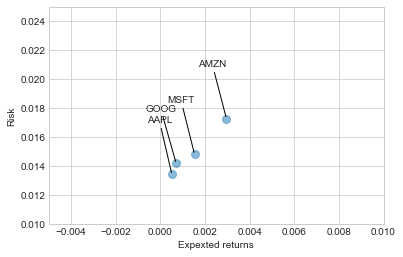

In [46]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s = np.pi*20)
plt.ylim([0.01, 0.025])
plt.xlim([-0.005, 0.01])

plt.xlabel('Expexted returns')
plt.ylabel('Risk')

for label ,x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(0,50),
                textcoords = 'offset points', ha = 'right', va='bottom',
                arrowprops= dict(arrowstyle='-', connectionstyle='arc3'))

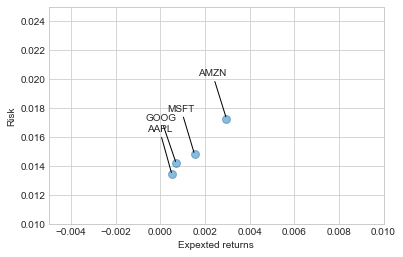

In [55]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s = np.pi*20)
plt.ylim([0.01, 0.025])
plt.xlim([-0.005, 0.01])

plt.xlabel('Expexted returns')
plt.ylabel('Risk')

for label ,x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(0,50),
                textcoords = 'offset points', ha = 'right', va='top',
                arrowprops= dict(arrowstyle='-', connectionstyle='arc3'))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


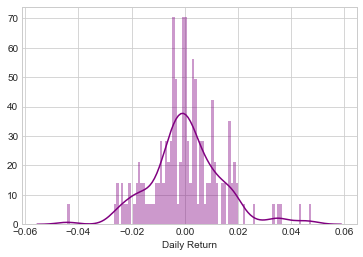

In [60]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [65]:
rets['AAPL'].quantile(0.05)

-0.020942267257164117

In [66]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [72]:
def stock_monte_carlo(start_start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return price

In [68]:
GOOG.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-08-11,907.97,917.7800,905.580,914.39,1190458.0,0.0,1.0,907.97,917.7800,905.580,914.39,1190458.0
2017-08-14,922.53,924.6680,918.190,922.67,1047828.0,0.0,1.0,922.53,924.6680,918.190,922.67,1047828.0
2017-08-15,924.23,926.5499,919.820,922.22,873070.0,0.0,1.0,924.23,926.5499,919.820,922.22,873070.0
2017-08-16,925.29,932.7000,923.445,926.96,988604.0,0.0,1.0,925.29,932.7000,923.445,926.96,988604.0
2017-08-17,925.78,926.8600,910.980,910.98,1218963.0,0.0,1.0,925.78,926.8600,910.980,910.98,1218963.0


Text(0.5,1,'Monte Carlo Analysis')

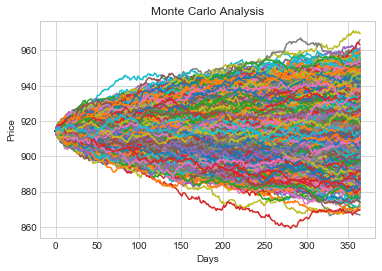

In [82]:
start_price = GOOG.iloc[0,10]

for run in range(10000):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis')

In [83]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
        simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([864.84333464, 865.36570146, 865.88806828, ..., 968.27196474,
        968.79433155, 969.31669837]),
 <a list of 200 Patch objects>)

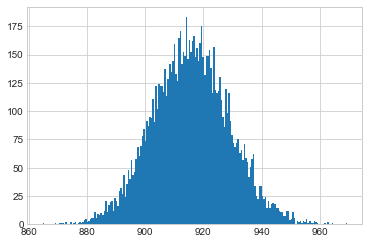

In [84]:
plt.hist(simulations, bins=200)

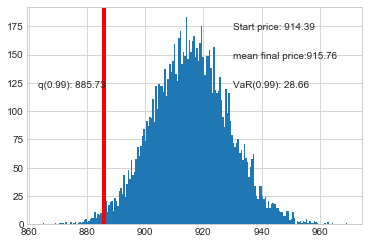

In [88]:
q = np.percentile(simulations, 1)
plt.hist(simulations, bins=200)

plt.figtext(0.6, 0.8, s='Start price: {:0.2f}'.format(start_price))
plt.figtext(0.6, 0.7, 'mean final price:{:0.2f}'.format(simulations.mean()))
plt.figtext(0.6, 0.6, 'VaR(0.99): {:0.2f}'.format(start_price-q))
plt.figtext(0.15, 0.6, 'q(0.99): {:0.2f}'.format(q))

plt.axvline(x = q, linewidth=4, color='r')

In [108]:
# 所謂ハイテク企業の株価を扱ってみます。
nikkei_list = ['JASDAQ']

# 直近1年間のデータを使ってみましょう。
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for stock in nikkei_list:
    globals()[stock] = quandl.get('NIKKEI/{}'.format(stock),start_date=start,end_date=end)

In [109]:
JASDAQ.describe()

,Close,Open,High,Low
count,246.000000,246.000000,246.000000,246.000000
mean,3837.824228,3838.744268,3850.444553,3824.389228
std,223.872701,225.319458,226.206280,222.681419
min,3285.610000,3283.520000,3286.350000,3266.520000
25%,3703.275000,3701.192500,3711.340000,3689.675000
50%,3881.090000,3889.700000,3897.525000,3857.775000
75%,3982.305000,3981.552500,3991.742500,3966.722500
max,4298.480000,4311.250000,4317.210000,4295.160000


In [115]:
start_price = JASDAQ.iloc[0,0]
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
        simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

(array([1., 0., 1., ..., 0., 0., 1.]),
 array([3113.69617788, 3115.51883748, 3117.34149708, ..., 3474.58277809,
        3476.40543769, 3478.22809728]),
 <a list of 200 Patch objects>)

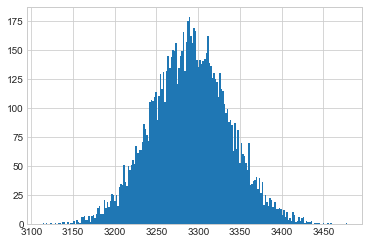

In [111]:
plt.hist(simulations, bins=200)

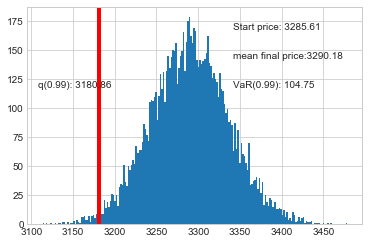

In [112]:
q = np.percentile(simulations, 1)
plt.hist(simulations, bins=200)

plt.figtext(0.6, 0.8, s='Start price: {:0.2f}'.format(start_price))
plt.figtext(0.6, 0.7, 'mean final price:{:0.2f}'.format(simulations.mean()))
plt.figtext(0.6, 0.6, 'VaR(0.99): {:0.2f}'.format(start_price-q))
plt.figtext(0.15, 0.6, 'q(0.99): {:0.2f}'.format(q))

plt.axvline(x = q, linewidth=4, color='r')

Text(0.5,1,'Monte Carlo Analysis')

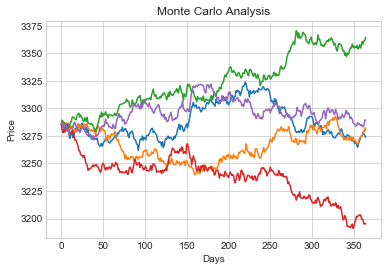

In [116]:
start_price = JASDAQ.iloc[0,0]
for run in range(5):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))     
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis')